# **TextMorph Advanced Text Summarization and Paraphrasing**
Summarization is the process of reducing a long piece of text into a concise version while retaining its main ideas. It is widely used in areas such as research, business reports, and news articles to help readers quickly grasp the essential information without going through the entire content.

Paraphrasing involves re-expressing text in a new way while preserving its original meaning. It is important for improving readability, avoiding plagiarism, adapting content for different audiences, and presenting ideas in clearer or more creative forms.

This project, TextMorph, focuses on building an advanced system for text summarization and paraphrasing using state-of-the-art models like T5 and PEGASUS. The goal is to make text processing more effective, time-saving, and context-aware, providing high-quality summaries and paraphrases across technical, business, and creative domains.

##Part-A
### Section 1.0: Session Setup
Let's get our environment ready by installing and importing the necessary libraries.

In [65]:
#@title 1.0: Install and Import Libraries
# Install the required libraries quietly.
!pip install nbstripout
!nbstripout Code(Milestone_1).ipynb

!pip install transformers sentencepiece --quiet
print("Libraries are installed.")

# Import the necessary classes from the transformers library.
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
# 'textwrap' is a great tool for formatting our output nicely.
import textwrap
print("Libraries are imported successfully.")

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `nbstripout Code(Milestone_1).ipynb'
Libraries are installed.
Libraries are imported successfully.


### Section 1.1: Loading Our T5 Summarization Model
We'll use t5-base, a powerful and well-balanced version of Google's T5 model. It's a great starting point for high-quality summarization.

In [2]:
#@title 1.1: Load the T5 Model and Tokenizer
# The model name we'll be using.
t5_model_name = 't5-base'

# The Tokenizer is responsible for converting text into a format the model understands.
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)

# The Model is the pre-trained AI that performs the summarization.
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)

print(f"T5 Model ('{t5_model_name}') is loaded and ready!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 Model ('t5-base') is loaded and ready!


### Section 1.2: The Summarizer Function
This is our core function. We're adding a new parameter, no_repeat_ngram_size, to prevent the model from repeating the same phrases.

In [3]:
#@title 1.2: Define the Core Summarizer Function
def generate_summary(text, min_len=40, max_len=120, beams=4):
    """
    Generates a high-quality abstractive summary for a given text using the T5 model.
    """
    # T5 models require a "summarize: " prefix to know which task to perform.
    input_text = "summarize: " + text.strip().replace("\n", " ")

    # Tokenize the text, ensuring it's not too long for the model.
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate the summary using our specified parameters.
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3, # Prevents repeating phrases of 3 words.
        length_penalty=2.0,
        early_stopping=True
    )

    # Decode the result back into human-readable text.
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

### Section 1.3: Code Examples with Diverse Texts
Let's test our summarizer on different styles of writing to see how it performs.

In [4]:
#@title 1.3.1: Example 1 - Technical Text (Deep Learning)
technical_text = """
Deep learning is a subfield of machine learning that focuses on using artificial neural networks with multiple layers to automatically learn complex patterns from large datasets.
Unlike traditional machine learning methods, which often rely on handcrafted features, deep learning models can perform automatic feature extraction through hierarchical representations.
The most common deep learning architectures include Convolutional Neural Networks (CNNs), which are highly effective for image processing; Recurrent Neural Networks (RNNs) and
their variants such as Long Short-Term Memory (LSTM) networks, which are widely used for sequential data like natural language and speech; and Transformers, which have become
the state-of-the-art in natural language processing due to their self-attention mechanism. Training deep networks requires large amounts of labeled data, powerful computational
resources such as GPUs or TPUs, and optimization techniques like stochastic gradient descent with backpropagation. Despite challenges like overfitting, high computational cost, and
lack of interpretability, deep learning has revolutionized domains such as computer vision, speech recognition, natural language processing, and autonomous systems.
"""

summary = generate_summary(technical_text, min_len=50, max_len=100)

print("----------- TECHNICAL TEXT -----------")
print(textwrap.fill(technical_text, width=100))
print("\n---------- T5 SUMMARY -----------")
print(textwrap.fill(summary, width=100))

----------- TECHNICAL TEXT -----------
 Deep learning is a subfield of machine learning that focuses on using artificial neural networks
with multiple layers to automatically learn complex patterns from large datasets. Unlike traditional
machine learning methods, which often rely on handcrafted features, deep learning models can perform
automatic feature extraction through hierarchical representations. The most common deep learning
architectures include Convolutional Neural Networks (CNNs), which are highly effective for image
processing; Recurrent Neural Networks (RNNs) and their variants such as Long Short-Term Memory
(LSTM) networks, which are widely used for sequential data like natural language and speech; and
Transformers, which have become the state-of-the-art in natural language processing due to their
self-attention mechanism. Training deep networks requires large amounts of labeled data, powerful
computational resources such as GPUs or TPUs, and optimization techniques like s

In [5]:
#@title 1.3.2: Example 2 - Business Text (Small Businesses)
business_text = """
Small businesses play a vital role in the economy by generating employment, fostering innovation, and contributing to local communities.
They are typically privately owned enterprises with fewer employees and lower revenue compared to large corporations. Access to funding
remains one of the biggest challenges for small businesses, as they often rely on personal savings, bank loans, or government schemes.
The adoption of digital technologies, such as e-commerce platforms, cloud services, and digital marketing tools, has significantly improved
their ability to compete with larger firms. However, small businesses also face obstacles like regulatory compliance, limited scalability,
and vulnerability to market fluctuations. With effective financial management, customer relationship strategies, and innovation, small
businesses can sustain growth and create long-term economic impact.
"""

summary = generate_summary(business_text, min_len=50, max_len=90)

print("----------- BUSINESS TEXT -----------")
print(textwrap.fill(business_text, width=100))
print("\n---------- T5 SUMMARY -----------")
print(textwrap.fill(summary, width=100))

----------- BUSINESS TEXT -----------
 Small businesses play a vital role in the economy by generating employment, fostering innovation,
and contributing to local communities. They are typically privately owned enterprises with fewer
employees and lower revenue compared to large corporations. Access to funding remains one of the
biggest challenges for small businesses, as they often rely on personal savings, bank loans, or
government schemes. The adoption of digital technologies, such as e-commerce platforms, cloud
services, and digital marketing tools, has significantly improved their ability to compete with
larger firms. However, small businesses also face obstacles like regulatory compliance, limited
scalability, and vulnerability to market fluctuations. With effective financial management, customer
relationship strategies, and innovation, small businesses can sustain growth and create long-term
economic impact.

---------- T5 SUMMARY -----------
small businesses are typically priva

In [6]:
#@title 1.3.3: Example 3 - Creative Text (Hidden Worlds)
creative_text = """
The little bookstore at the corner of the street seemed almost invisible to the rushing crowd, yet inside it
carried worlds beyond imagination. Dusty shelves leaned under the weight of forgotten tales, while sunlight
fell like golden ribbons across the cracked wooden floor. Each book whispered promises of faraway lands,
adventures yet to be lived, and memories waiting to be revived. For the few who wandered in, time slowed,
and the noise of the city melted into silence, replaced by the quiet hum of stories eager to be discovered.
"""

summary = generate_summary(creative_text, min_len=30, max_len=50)

print("----------- CREATIVE TEXT -----------")
print(textwrap.fill(creative_text, width=100))
print("\n---------- T5 SUMMARY -----------")
print(textwrap.fill(summary, width=100))

----------- CREATIVE TEXT -----------
 The little bookstore at the corner of the street seemed almost invisible to the rushing crowd, yet
inside it carried worlds beyond imagination. Dusty shelves leaned under the weight of forgotten
tales, while sunlight fell like golden ribbons across the cracked wooden floor. Each book whispered
promises of faraway lands, adventures yet to be lived, and memories waiting to be revived. For the
few who wandered in, time slowed, and the noise of the city melted into silence, replaced by the
quiet hum of stories eager to be discovered.

---------- T5 SUMMARY -----------
the little bookstore at the corner of the street seemed almost invisible to the rushing crowd . but
inside it carried worlds beyond imagination . the noise of the city melted into silence, replaced by
the quiet hum of stories eager to


### Section 1.4: The Interactive Summarizer Studio
Now it's your turn! Paste your own text, experiment with the settings, and see how you can craft the perfect summary.

In [7]:
#@title 1.4: Your Interactive Summarizer Studio!
#@markdown ### Paste your text below and tune the parameters!
input_text = "'Planets are celestial bodies that orbit stars and do not produce their own light. In our solar system, there are eight recognized planets divided into two groups: terrestrial planets and gas giants. The terrestrial planets—Mercury, Venus, Earth, and Mars—are small, rocky, and have solid surfaces. Gas giants, which include Jupiter and Saturn, along with ice giants Uranus and Neptune, are massive planets composed mostly of hydrogen, helium, and other gases. Each planet has unique features, such as Earth’s ability to support life, Jupiter’s Great Red Spot, or Saturn’s rings. Studying planets helps scientists understand the formation of solar systems, the possibility of extraterrestrial life, and the conditions necessary for habitability.'" #@param {type:"string"}
min_length = 30 #@param {type:"slider", min:10, max:100, step:5}
max_length = 80 #@param {type:"slider", min:50, max:200, step:10}
num_beams = 4 #@param {type:"slider", min:2, max:8, step:1}

# --- Run the summarizer with your settings ---
generated_summary = generate_summary(input_text, min_len=min_length, max_len=max_length, beams=num_beams)

# --- Display the results and analysis ---
original_word_count = len(input_text.split())
summary_word_count = len(generated_summary.split())
reduction = 100 - (summary_word_count / original_word_count * 100)

print("----------- YOUR INPUT TEXT -----------")
print(textwrap.fill(input_text, width=100))
print("\n---------- GENERATED SUMMARY -----------")
print(textwrap.fill(generated_summary, width=100))
print("\n---------- ANALYSIS -----------")
print(f"Original Word Count: {original_word_count}")
print(f"Summary Word Count: {summary_word_count}")
print(f"Text Reduction: {reduction:.1f}%")

----------- YOUR INPUT TEXT -----------
'Planets are celestial bodies that orbit stars and do not produce their own light. In our solar
system, there are eight recognized planets divided into two groups: terrestrial planets and gas
giants. The terrestrial planets—Mercury, Venus, Earth, and Mars—are small, rocky, and have solid
surfaces. Gas giants, which include Jupiter and Saturn, along with ice giants Uranus and Neptune,
are massive planets composed mostly of hydrogen, helium, and other gases. Each planet has unique
features, such as Earth’s ability to support life, Jupiter’s Great Red Spot, or Saturn’s rings.
Studying planets helps scientists understand the formation of solar systems, the possibility of
extraterrestrial life, and the conditions necessary for habitability.'

---------- GENERATED SUMMARY -----------
in our solar system, there are eight recognized planets divided into two groups: terrestrial planets
and gas giants . each planet has unique features, such as Earth’s abil

### Section 2.0: Loading Our PEGASUS Paraphrasing Model
We'll use a PEGASUS model that has been specifically fine-tuned for the task of paraphrasing.

In [8]:
#@title 2.0: Load the PEGASUS Model and Tokenizer
paraphrase_model_name = 'tuner007/pegasus_paraphrase'

pegasus_tokenizer = PegasusTokenizer.from_pretrained(paraphrase_model_name)
pegasus_model = PegasusForConditionalGeneration.from_pretrained(paraphrase_model_name)

print(f"PEGASUS Model ('{paraphrase_model_name}') is loaded and ready!")

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PEGASUS Model ('tuner007/pegasus_paraphrase') is loaded and ready!


### Section 2.1: The Paraphraser Function
This function will take our input sentence and generate a list of high-quality alternatives.



In [9]:
#@title 2.1: Define the Core Paraphraser Function
def generate_paraphrases(text, num_return=5, beams=10):
    """
    Generates multiple high-quality paraphrases for a given text using the PEGASUS model.
    """
    # Tokenize the input text.
    inputs = pegasus_tokenizer.encode(text, return_tensors='pt', truncation=True)

    # Generate the paraphrases using beam search.
    paraphrase_ids = pegasus_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )

    # Decode the results back into text.
    paraphrases = pegasus_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)
    return paraphrases

### Section 2.2: Code Examples with Diverse Sentences
Let's see how PEGASUS handles different kinds of language.

In [10]:
#@title 2.2.1: Example 1 - Formal / Academic Sentence
formal_sentence = "Artificial intelligence is transforming various industries by enabling automation and data-driven decision-making. Its integration into healthcare, finance, and education has improved efficiency and accuracy."
paraphrases = generate_paraphrases(formal_sentence, num_return=3)

print(f"----------- ORIGINAL FORMAL SENTENCE -----------\n'{formal_sentence}'\n")
print("---------- PEGASUS PARAPHRASES ----------")
for i, p in enumerate(paraphrases):
    print(f"  {i+1}. {p}")

----------- ORIGINAL FORMAL SENTENCE -----------
'Artificial intelligence is transforming various industries by enabling automation and data-driven decision-making. Its integration into healthcare, finance, and education has improved efficiency and accuracy.'

---------- PEGASUS PARAPHRASES ----------
  1. Artificial intelligence is changing industries by enabling automation and data-driven decision-making.
  2. The integration of artificial intelligence into healthcare, finance, and education has improved efficiency.
  3. Artificial intelligence is transforming industries by enabling automation and data-driven decision-making.


In [11]:
#@title 2.2.2: Example 2 - Casual / Idiomatic Sentence
casual_sentence = "Sara was on cloud nine after hearing she won the competition."
paraphrases = generate_paraphrases(casual_sentence, num_return=4)

print(f"----------- ORIGINAL CASUAL SENTENCE -----------\n'{casual_sentence}'\n")
print("---------- PEGASUS PARAPHRASES ----------")
for i, p in enumerate(paraphrases):
    print(f"  {i+1}. {p}")

----------- ORIGINAL CASUAL SENTENCE -----------
'Sara was on cloud nine after hearing she won the competition.'

---------- PEGASUS PARAPHRASES ----------
  1. Sara was ecstatic when she heard she won the competition.
  2. Sara was ecstatic after she won the competition.
  3. Sara found out she won the competition.
  4. Sara was happy to hear she won the competition.


In [12]:
#@title 2.2.3: Example 3 - Marketing Call-to-Action
marketing_sentence = "Sign up today and get exclusive access to our latest deals before anyone else!"
paraphrases = generate_paraphrases(marketing_sentence, num_return=4)

print(f"----------- ORIGINAL MARKETING SENTENCE -----------\n'{marketing_sentence}'\n")
print("---------- PEGASUS PARAPHRASES ----------")
for i, p in enumerate(paraphrases):
    print(f"  {i+1}. {p}")

----------- ORIGINAL MARKETING SENTENCE -----------
'Sign up today and get exclusive access to our latest deals before anyone else!'

---------- PEGASUS PARAPHRASES ----------
  1. You will get exclusive access to our latest deals before anyone else.
  2. You will get exclusive access to our latest deals when you sign up.
  3. Get exclusive access to our latest deals when you sign up.
  4. We will give you exclusive access to our latest deals before anyone else.


### Section 2.3: The Interactive Paraphraser Playground
Your turn! Enter any sentence and generate creative new ways to phrase it.

In [13]:
#@title 2.3: Your Interactive Paraphraser Playground!
#@markdown ###  Type your sentence and choose your settings!
input_sentence = "Discover the benefits of adopting a healthy lifestyle today." #@param {type:"string"}
num_paraphrases = 6 #@param {type:"slider", min:1, max:10, step:1}
quality_vs_speed_beams = 6 #@param {type:"slider", min:2, max:15, step:1}

# --- Run the paraphraser with your settings ---
generated_paraphrases = generate_paraphrases(input_sentence, num_return=num_paraphrases, beams=quality_vs_speed_beams)

# --- Display the results ---
print(f"----------- ORIGINAL SENTENCE -----------\n'{input_sentence}'\n")
print(f"---------- {len(generated_paraphrases)} GENERATED PARAPHRASES (Quality: {quality_vs_speed_beams}) ----------")
for i, p in enumerate(generated_paraphrases):
    print(f"  {i+1}. {p}")

----------- ORIGINAL SENTENCE -----------
'Discover the benefits of adopting a healthy lifestyle today.'

---------- 6 GENERATED PARAPHRASES (Quality: 6) ----------
  1. You can discover the benefits of a healthy lifestyle.
  2. The benefits of a healthy lifestyle can be found today.
  3. Adopting a healthy lifestyle can benefit you today.
  4. Adopting a healthy lifestyle can have benefits.
  5. You can discover the benefits of a healthy lifestyle today.
  6. The benefits of a healthy lifestyle can be discovered.


##Part-B
### Section 0.1: Install Libraries
Install required dependencies (no NLTK, spaCy, langdetect, textstat, or wordcloud).

In [14]:
!pip install transformers sentencepiece sentence-transformers scikit-learn matplotlib pandas --quiet
print("Libraries are installed.")

Libraries are installed.


### Section 0.2: Import Libraries
Import necessary libraries.

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap
import re
import requests
import ssl
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Handle SSL for file downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("Libraries are imported.")

Libraries are imported.


### Section 0.3: Load Summarization Models
Load T5, BART, and PEGASUS for summarization.

In [16]:
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
print("Summarization models loaded: T5, BART, PEGASUS.")

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

Summarization models loaded: T5, BART, PEGASUS.


### Section 0.4: Load Paraphrasing Models
Load PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [17]:
pegasus_para_tokenizer = PegasusTokenizer.from_pretrained('tuner007/pegasus_paraphrase')
pegasus_para_model = PegasusForConditionalGeneration.from_pretrained('tuner007/pegasus_paraphrase')
paraphrase_t5_tokenizer = T5Tokenizer.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_t5_model = T5ForConditionalGeneration.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_bart_tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
paraphrase_bart_model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')
print("Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.


### Section 0.5: Load Similarity Model
Load SentenceTransformer for similarity.

In [18]:
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')
print("Similarity model loaded.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity model loaded.


## Part 1: Text Input Processing
### Section 1.1: Load Single Text File
Load and clean a text file from a URL, with a fallback if the request fails.

In [19]:
def load_text_file(url):
    """Load and clean text from a URL."""
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        text = response.text
        # Clean Gutenberg headers/footers
        start_idx = max([text.find(marker) for marker in ["*** START OF", "CHAPTER"]] + [0])
        end_idx = text.find("*** END OF")
        if start_idx > 0 and end_idx > 0:
            text = text[start_idx:end_idx]
        if len(text) < 100:
            raise ValueError("Text is too short.")
        return text.strip(), "Text file"
    except Exception as e:
        print(f"Error loading text from {url}: {e}")
        fallback = """Natural Language Processing enables computers to understand human language."""
        return fallback, "Fallback text"

### Section 1.2: Validate Text Input
Validate text length and content, ensure the loaded text is sufficiently long and is a string.

In [20]:
def validate_text(text):
    """Validate text input."""
    if not isinstance(text, str) or len(text.strip()) < 50:
        raise ValueError("Invalid text: must be a string with at least 50 characters.")
    return text

### Section 1.3: Load Multiple Text Files
Load two text files for processing, limiting to 50,000 characters each.

In [21]:
def load_multiple_text_files(urls):
    """Load multiple text files with validation."""
    if len(urls) != 2:
        raise ValueError("Exactly two URLs must be provided.")
    texts = {}
    for i, url in enumerate(urls, 1):
        text, source = load_text_file(url)
        text = validate_text(text)
        texts[f"Text {i}"] = {'text': text[:50000], 'source': source}  # Limit size
    return texts

In [26]:
def clean_text(text):
    """Remove non-ASCII characters, Gutenberg headers/footers, and normalize whitespace."""
    # Remove Gutenberg headers/footers
    text = re.sub(r'\*\*\*.*?START OF.*?\*\*\*', '', text, flags=re.DOTALL)
    text = re.sub(r'\*\*\*.*?END OF.*?\*\*\*', '', text, flags=re.DOTALL)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


### Section 1.4: Test Text Loading
Load and preview two example Gutenberg texts.

In [27]:
file_urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",  # Alice's Adventures in Wonderland
    "https://www.gutenberg.org/files/1661/1661-0.txt"  # The Adventures of Sherlock Holmes
]
loaded_texts = load_multiple_text_files(file_urls)
    # Clean all loaded texts and show structured preview
for key, data in loaded_texts.items():
    loaded_texts[key]['text'] = clean_text(data['text'])
    print(f"\n{key} ({data['source']}): {len(loaded_texts[key]['text']):,} characters")
    # Take first 500 chars for preview
    preview_text = loaded_texts[key]['text'][:500]

    # Replace common section delimiters with newline for readability
    preview_text = re.sub(r'CHAPTER\s+\w+\.?', r'\n\g<0>', preview_text, flags=re.IGNORECASE)
    preview_text = re.sub(r'I\.', r'\nI.', preview_text)
    preview_text = re.sub(r'II\.', r'\nII.', preview_text)
    preview_text = re.sub(r'III\.', r'\nIII.', preview_text)
    preview_text = re.sub(r'IV\.', r'\nIV.', preview_text)
    preview_text = re.sub(r'V\.', r'\nV.', preview_text)

    print(f"Preview:\n{preview_text}\n")



Text 1 (Text file): 48,856 characters
Preview:

CHAPTER 
I. Down the Rabbit-Hole 
CHAPTER I
I. The Pool of Tears 
CHAPTER II
I. A Caucus-Race and a Long Tale 
CHAPTER 
I
V. The Rabbit Sends in a Little Bill 
CHAPTER 
V. Advice from a Caterpillar 
CHAPTER V
I. Pig and Pepper 
CHAPTER VI
I. A Mad Tea-Party 
CHAPTER VII
I. The Queen s Croquet-Ground 
CHAPTER IX. The Mock Turtle s Story 
CHAPTER X. The Lobster Quadrille 
CHAPTER X
I. Who Stole the Tarts? 
CHAPTER XI
I. Alice s Evidence 
CHAPTER 
I. Down the Rabbit-Hole Alice was beginning to get very tired of sitting by


Text 2 (Text file): 47,674 characters
Preview:
The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents 
I. A Scandal in Bohemia I
I. The Red-Headed League II
I. A Case of Identity 
I
V. The Boscombe Valley Mystery 
V. The Five Orange Pips V
I. The Man with the Twisted Lip VI
I. The Adventure of the Blue Carbuncle VII
I. The Adventure of the Speckled Band IX. The Adventure of the Engineer s Thumb X. The Adventure

## Part 2: Core Analysis Components
### Section 2.1: T5 Summarization
Summarize text using T5.

In [28]:
def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

### Section 2.2: BART Summarization
Summarize text using BART.

In [29]:
def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

### Section 2.3: PEGASUS Summarization
Summarize text using PEGASUS.

In [30]:
def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

### Section 2.4: PEGASUS Paraphrasing
Generate paraphrases using PEGASUS.

In [31]:
def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.5: T5 Paraphrasing
Generate paraphrases using T5-Paraphrase.

In [32]:
def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.6: BART Paraphrasing
Generate paraphrases using BART-Paraphrase.

In [33]:
def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.7: Similarity Analysis
Compute semantic similarity.

In [34]:
def compute_similarity(text1, text2):
    """Compute cosine similarity between texts safely."""
    if not text1.strip() or not text2.strip():
        return 0.0
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

## Part 3: Enhanced Model Comparison
### Section 3.1: Summary Length Analysis
Compute summary length.

In [35]:
def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

### Section 3.2: Similarity to Original
Compute similarity to original text.

In [36]:
def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

### Section 3.3: Enhanced Summarization Comparison
Compare T5, BART, and PEGASUS for summarization.

In [37]:
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

### Section 3.4: Enhanced Paraphrasing Comparison
Compare PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [38]:
def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

## Part 4: Integrated TextMorph Pipeline
### Section 4.1: Pipeline Initialization
Initialize the pipeline class.

In [39]:
class TextMorphPipeline:
    """Streamlined TextMorph pipeline for text files, no preprocessing or NLP."""

    def __init__(self):
        self.reference_texts = []

    def add_reference(self, text):
        """Add reference text for similarity."""
        self.reference_texts.append(text)

### Section 4.2: Pipeline Summarization Step
Summarize in pipeline.

In [40]:
def pipeline_summarize(self, input_text, summarizer='t5'):
    """Summarization step in pipeline."""
    if summarizer == 't5':
        summary = generate_t5_summary(input_text)
    elif summarizer == 'bart':
        summary = generate_bart_summary(input_text)
    elif summarizer == 'pegasus':
        summary = generate_pegasus_summary(input_text)
    else:
        raise ValueError("Invalid summarizer. Choose 't5', 'bart', or 'pegasus'.")
    return summary, summarizer

### Section 4.3: Pipeline Paraphrasing Step
Paraphrase in pipeline with comparison.

In [41]:
def pipeline_paraphrase(self, input_text, paraphrase_sentences=2):
    """Paraphrasing step with comparison, robust version."""
    # Split into sentences and filter out very short ones
    sentences = [s.strip() for s in re.split(r'[.!?]+', input_text) if len(s.strip()) > 20]
    if not sentences:
        # Fallback if no sentence is long enough
        sentences = [input_text[:100].strip()]
    sentences = sentences[:paraphrase_sentences]  # limit to requested number

    paraphrases = {}
    for i, sent in enumerate(sentences):
        key = f'Sentence {i+1}'
        metrics = compare_paraphrasers_enhanced(sent)
        paraphrases[key] = {'original': sent[:100] + "...", 'metrics': metrics}
    return paraphrases


### Section 4.4: Pipeline Similarity Step
Compute similarity in pipeline.

In [42]:
def pipeline_similarity(self, input_text, top_k_similar=2):
    """Similarity step in pipeline."""
    if self.reference_texts:
        similarities = [(i+1, compute_similarity(input_text[:2000], ref)) for i, ref in enumerate(self.reference_texts)]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k_similar]
    return []

### Section 4.5: Full Pipeline Process
Run the full pipeline.

In [43]:
def process(self, input_text, summarizer='t5', paraphrase_sentences=2, top_k_similar=2):
    """Run the full pipeline."""
    results = {}

    summary, used_summarizer = pipeline_summarize(self, input_text, summarizer)
    results['summary'] = summary
    results['summarizer_used'] = used_summarizer

    results['paraphrases'] = pipeline_paraphrase(self, input_text, paraphrase_sentences)

    results['similarities'] = pipeline_similarity(self, input_text, top_k_similar)

    return results

# Bind methods to class
TextMorphPipeline.pipeline_summarize = pipeline_summarize
TextMorphPipeline.pipeline_paraphrase = pipeline_paraphrase
TextMorphPipeline.pipeline_similarity = pipeline_similarity
TextMorphPipeline.process = process

# Initialize
pipeline = TextMorphPipeline()

## Part 5: Testing with Text Files
### Section 5.1: Add Reference Texts
Add references for similarity.
Add reference sentences for similarity/comparison purposes

In [44]:
pipeline.add_reference("Natural Language Processing powers modern AI applications.")
pipeline.add_reference("Machine learning enhances text analysis capabilities.")
print("Reference texts added.")

Reference texts added.


### Section 5.2: Process First Text (T5)
Run pipeline with T5 summarizer on the first text (Alice’s Adventures in Wonderland).

In [45]:
first_text = loaded_texts['Text 1']['text'][:2000]
results_t5_first = pipeline.process(first_text, summarizer='t5')
print("----------- T5 on First Text (Alice’s Adventures in Wonderland) -----------")
print(f"Summary: {textwrap.fill(results_t5_first['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 7.0, Avg Sim to Original: 0.883):
  1. Chapter 2 of Down the Rabbit-Hole.
  2. Chapter 2 is called Down the Rabbit-Hole.
  3. The second chapter is called Down the Rabbit-Hole.

T5-Paraphrase Paraphrases (Avg Length: 4.7, Avg Sim to Original: 0.990):
  1. Down the Rabbit-Hole CHAPTER II
  2. Down Rabbit-Hole CHAPTER II
  3. Down the rabbit-hole CHAPTER II

BART-Paraphrase Paraphrases (Avg Length: 6.0, Avg Sim to Original: 0.978):
  1. Down the rabbit hole chapter II
  2. Down the rabbit hole CHAPTER II
  3. Down the Rabbit Hole CHAPTER II

Average Similarity PEGASUS vs T5-Paraphrase: 0.873
Average Similarity PEGASUS vs BART-Paraphrase: 0.884
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.971


/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 7.3, Avg Sim to Original: 0.957):
  1. Chapter 3 of the pool of tears
  2. Chapter 3 of The Pool of Tears.
  3. The third chapter of the pool of tears.

T5-Paraphrase Paraphrases (Avg Length: 6.0, Avg Sim to Original: 0.922):
  1. The Pool of Tears CHAPTER III
  2. The pool of tears CHAPTER III
  3. The pool of tears CHAPTTER III

BART-Paraphrase Paraphrases (Avg Length: 6.0, Avg Sim to Original: 0.996):
  1. The Pool of Tears Chapter III
  2. The Pool of Tears Chapter 3
  3. The Pool of Tears CHAPTER III

Average Similarity PEGASUS vs T5-Paraphrase: 0.892
Average Similarity PEGASUS vs BART-Paraphrase: 0.958
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.918
----------- T5 on First Text (Alice’s Adventures in Wonderland) -----------
Summary: a white rabbit with pink eyes popped down a rabbit-hole under a hedge . the rabbit dipped down like
a tunnel for some way, and then down went Alice af

### Section 5.3: Process Second Text (PEGASUS)
Run pipeline with PEGASUS on second text (The Adventures of Sherlock Holmes).

In [46]:
second_text = loaded_texts['Text 2']['text'][:2000]
results_pegasus_second = pipeline.process(second_text, summarizer='pegasus')
print("----------- PEGASUS on Second Text (The Adventures of Sherlock Holmes) -----------")
print(f"Summary: {textwrap.fill(results_pegasus_second['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 10.0, Avg Sim to Original: 0.855):
  1. The ADVENTURES OF SHERLOCK HOLMES BY ARTHUR CONNOR DOY
  2. The contents of the first edition of The ADVENTURES OF SHERLOCK HOLMES.
  3. The ADVENTURES OF SHERLOCK HOLMES BY ARTHUR CONNOR DOY.

T5-Paraphrase Paraphrases (Avg Length: 10.7, Avg Sim to Original: 0.997):
  1. The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents I
  2. The adventures of Sherlock Holmes by Arthur Conan Doyle Contents I
  3. The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents

BART-Paraphrase Paraphrases (Avg Length: 10.3, Avg Sim to Original: 0.994):
  1. The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents I
  2. The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents
  3. The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents 

Average Similarity PEGASUS vs T5-Paraphrase: 0.853
Average Similarity PEGASUS vs BART-Paraphrase:

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 6.7, Avg Sim to Original: 0.955):
  1. There was a scandal in Bohemia II.
  2. There was a scandal in Bohemia.
  3. There was a Scandal in Bohemia II.

T5-Paraphrase Paraphrases (Avg Length: 4.7, Avg Sim to Original: 0.994):
  1. A scandal in Bohemia II
  2. A Scandal in Bohemia II
  3. Scandal in Bohemia II

BART-Paraphrase Paraphrases (Avg Length: 5.0, Avg Sim to Original: 0.995):
  1. A scandal in Bohemia II
  2. A Scandal in Bohemia II
  3. A scandal in Bohemia II?

Average Similarity PEGASUS vs T5-Paraphrase: 0.951
Average Similarity PEGASUS vs BART-Paraphrase: 0.956
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.991
----------- PEGASUS on Second Text (The Adventures of Sherlock Holmes) -----------
Summary: The Adventures of Sherlock Holmes by Arthur Conan Doyle is published by Random House, a division of
Random House Inc., in the United States, Canada, Australia and New Zealand, and 

### Section 5.4: Enhanced Comparison on Both Texts
Compare T5, BART, and PEGASUS on both texts.

In [47]:
print("----------- Enhanced Summarization Comparison on First Text -----------")
comparison_first = compare_summarizers_enhanced(first_text)
print("----------- Enhanced Summarization Comparison on Second Text -----------")
comparison_second = compare_summarizers_enhanced(second_text)

----------- Enhanced Summarization Comparison on First Text -----------
----------- Enhanced Summarization Comparison -----------
T5 Summary (Length: 63, Sim to Original: 0.571):
a white rabbit with pink eyes popped down a rabbit-hole under a hedge . the rabbit dipped down like
a tunnel for some way, and then down went Alice after it . she had never before seen a White Rabbit
with a waistcoat-pocket or a watch to take out of . when she heard the Rabbit say, Oh dear! I shall
be late!

BART Summary (Length: 101, Sim to Original: 0.879):
CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race and a Long
Tale CHAPTER IV. The Rabbit Sends in a Little Bill CHAPTER V. Advice from a Caterpillar CHAPTER VI.
Pig and Pepper CHAPTER VII. A Mad Tea-Party CHAPTER VIII. The Queen s Croquet-Ground CHAPTER IX. The
Mock Turtle s Story CHAPTER X. The Lobster Quadrille CHAPTER XI. Who Stole the Tarts? CHAPTER XII.
Alice s Evidence CHAPTER XIII. Alice Sends a Rabbit to Her 

## Part 6: Visualization & Insights
### Section 6.1: Enhanced Summarization Metrics Plot
Visualize T5 vs BART vs PEGASUS metrics.

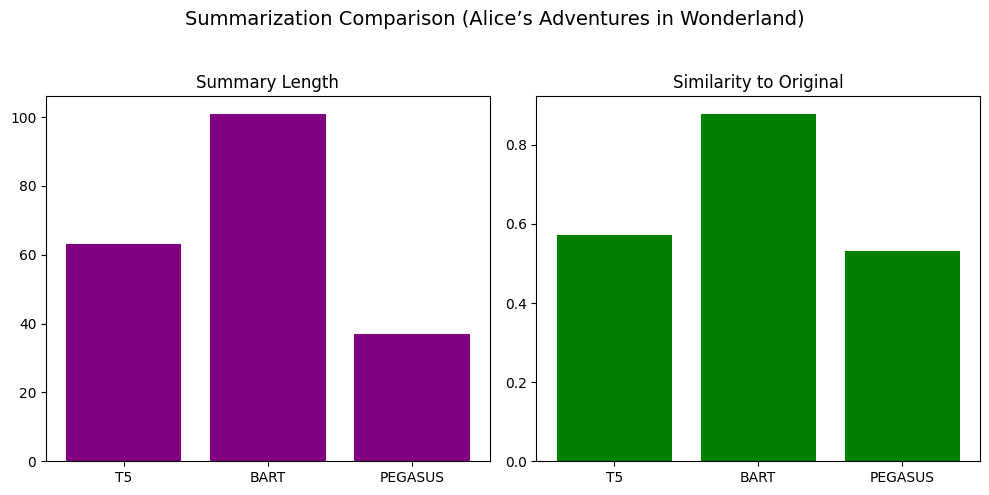

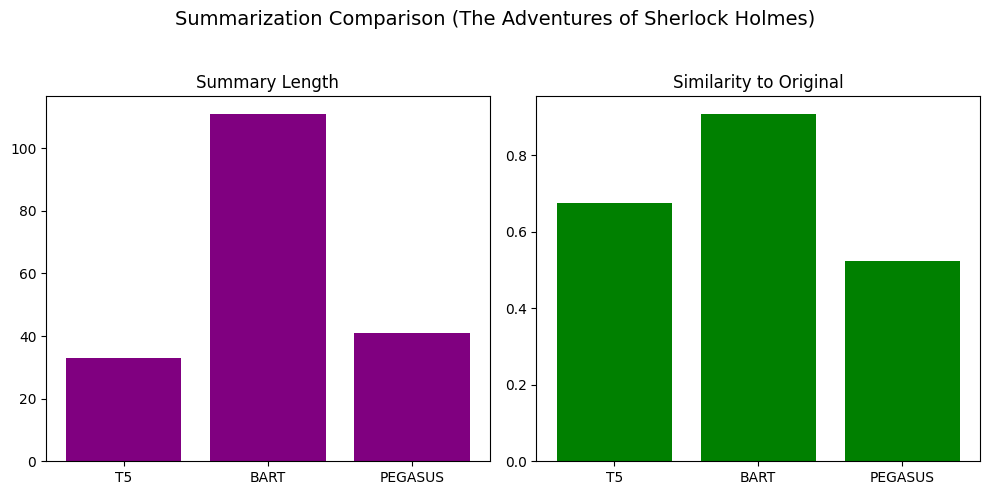

In [55]:
def plot_enhanced_summarization_comparison(metrics, title="Summarization Comparison"):
    """Plot enhanced metrics for summarization models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Length
    ax1.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['length'], metrics['bart']['length'], metrics['pegasus']['length']],
            color='purple')
    ax1.set_title('Summary Length')

    # Similarity to Original
    ax2.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['sim_to_original'],
             metrics['bart']['sim_to_original'],
             metrics['pegasus']['sim_to_original']],
            color='green')
    ax2.set_title('Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_enhanced_summarization_comparison(comparison_first, title="Summarization Comparison (Alice’s Adventures in Wonderland)")
plot_enhanced_summarization_comparison(comparison_second, title="Summarization Comparison (The Adventures of Sherlock Holmes)")

### Section 6.2: Enhanced Paraphrasing Metrics Plot
Visualize PEGASUS vs T5-Paraphrase vs BART-Paraphrase metrics.

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.916):
  1. Chapter I.
  2. Chapter I
  3. Chapter I begins.

T5-Paraphrase Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.551):
  1. CHAPTER I
  2. CHAPITRE I
  3. CHAPTTER I

BART-Paraphrase Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.913):
  1. CHAPTER I
  2. CHAPTER 1
  3. CHAPTER _ I

Average Similarity PEGASUS vs T5-Paraphrase: 0.507
Average Similarity PEGASUS vs BART-Paraphrase: 0.836
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.499


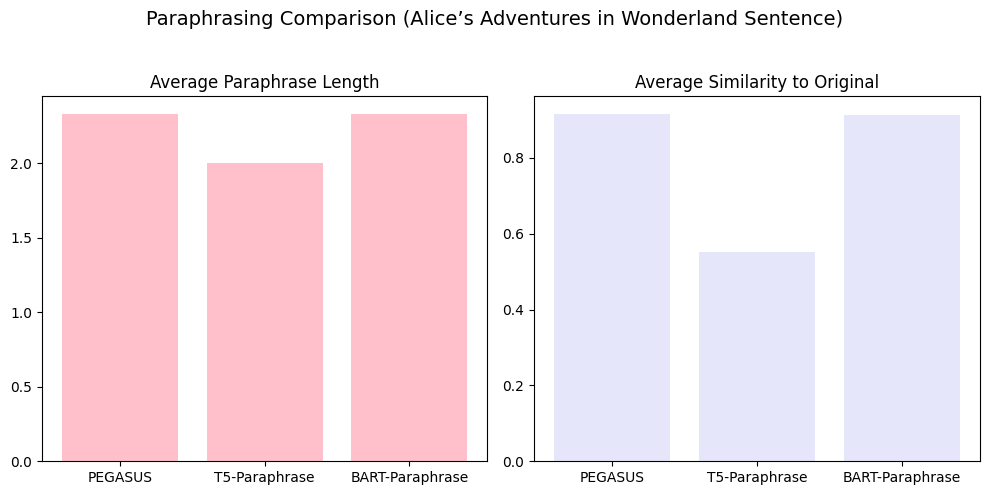

In [56]:
def plot_enhanced_paraphrasing_comparison(metrics, title="Paraphrasing Comparison"):
    """Plot enhanced metrics for paraphrasing models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Average Length
    ax1.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_length'],
             metrics['t5_paraphrase']['avg_length'],
             metrics['bart_paraphrase']['avg_length']],
            color='pink')
    ax1.set_title('Average Paraphrase Length')

    # Average Similarity to Original
    ax2.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_sim_to_original'],
             metrics['t5_paraphrase']['avg_sim_to_original'],
             metrics['bart_paraphrase']['avg_sim_to_original']],
            color='lavender')
    ax2.set_title('Average Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot paraphrasing comparison for first sentence of first text
first_sentence = re.split(r'[.!?]+', first_text)[0].strip()
plot_enhanced_paraphrasing_comparison(compare_paraphrasers_enhanced(first_sentence),
                                     title="Paraphrasing Comparison (Alice’s Adventures in Wonderland Sentence)")

### Section 6.3: Bigram Analysis
Add bigram analysis using simple string splitting.

In [57]:
def analyze_bigrams(text):
    """Compute top bigrams using string splitting."""
    text = clean_text(text[:2000])  # Clean and limit for performance
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(5)
    return [(f"{w1} {w2}", count) for (w1, w2), count in bigram_freq]

print("\nBigram Analysis")
for key, data in loaded_texts.items():
    print(f"\n{key}:")
    bigrams = analyze_bigrams(data['text'])
    print(f"Top Bigrams: {bigrams}")


Bigram Analysis

Text 1:
Top Bigrams: [('it, and', 4), ('out of', 3), ('CHAPTER I.', 2), ('I. Down', 2), ('Down the', 2)]

Text 2:
Top Bigrams: [('of the', 7), ('The Adventure', 6), ('Adventure of', 6), ('in a', 3), ('his own', 3)]


### Section 6.4: Bigram Visualization
Visualize bigram frequencies.

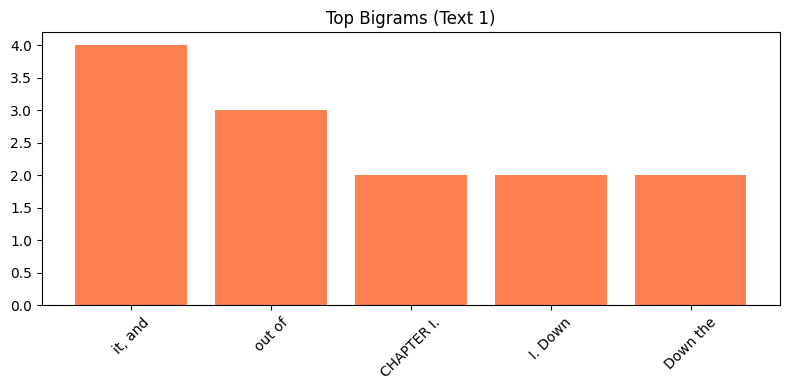

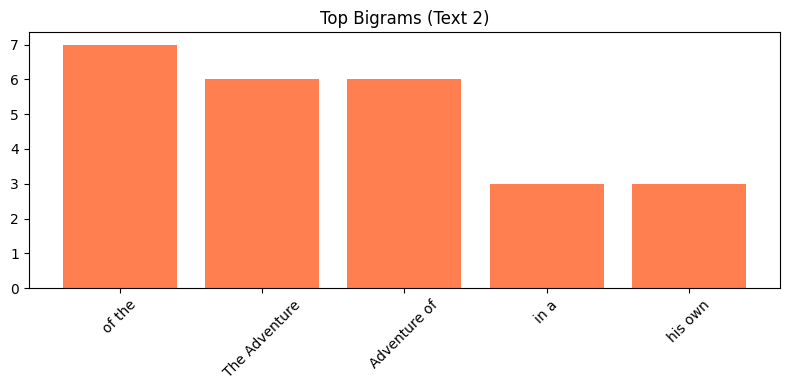

In [62]:
def plot_bigrams(bigrams, title="Top Bigrams"):
    """Plot top bigrams."""
    if bigrams:
        labels, counts = zip(*bigrams)
        plt.figure(figsize=(8, 4))
        plt.bar(labels, counts, color='coral')
        plt.title(title, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

for key, data in loaded_texts.items():
    bigrams = analyze_bigrams(data['text'])
    plot_bigrams(bigrams, title=f"Top Bigrams ({key})")

### Section 6.5: Word Cloud Visualization
Shows the most frequent words in the text.

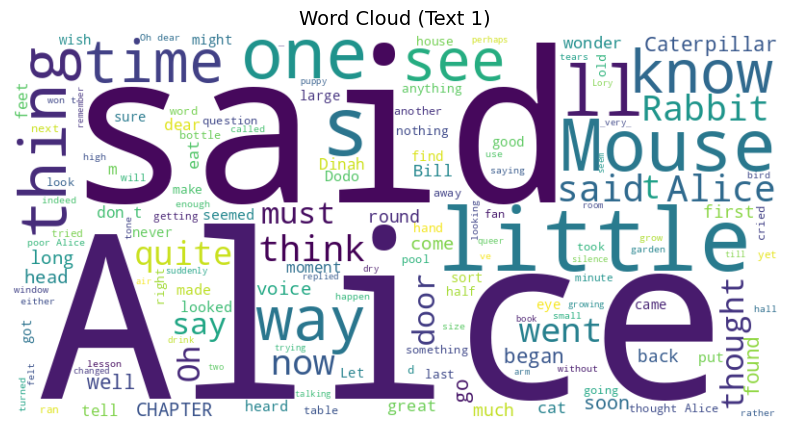

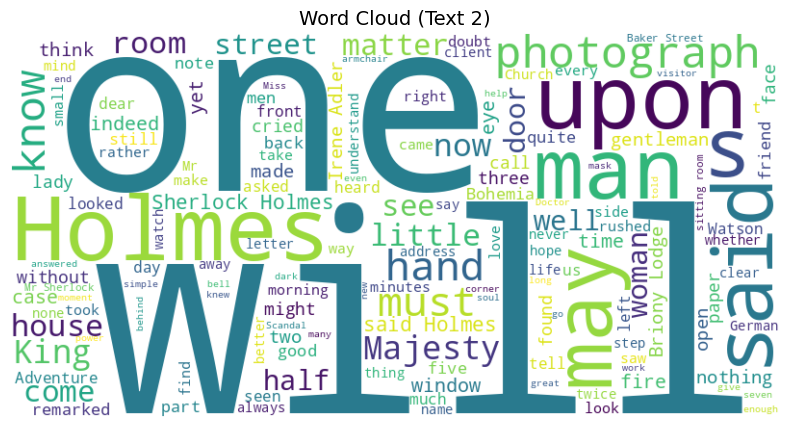

In [63]:
# Install wordcloud if not already
!pip install wordcloud --quiet

from wordcloud import WordCloud

def plot_wordcloud(text, title="Word Cloud"):
    """Generate and plot a word cloud from text."""
    text = clean_text(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=150).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Example usage
for key, data in loaded_texts.items():
    plot_wordcloud(data['text'], title=f"Word Cloud ({key})")


### Section 6.6: Heatmap Visualization
Displays word co-occurrence frequencies across the text.

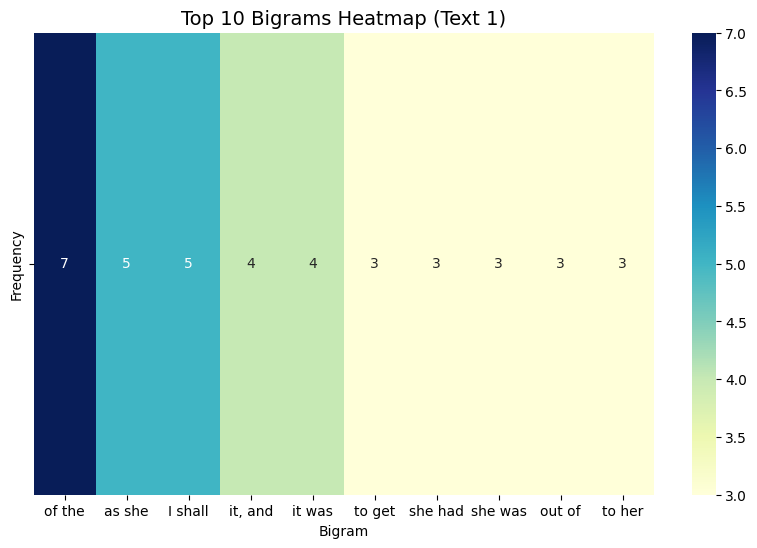

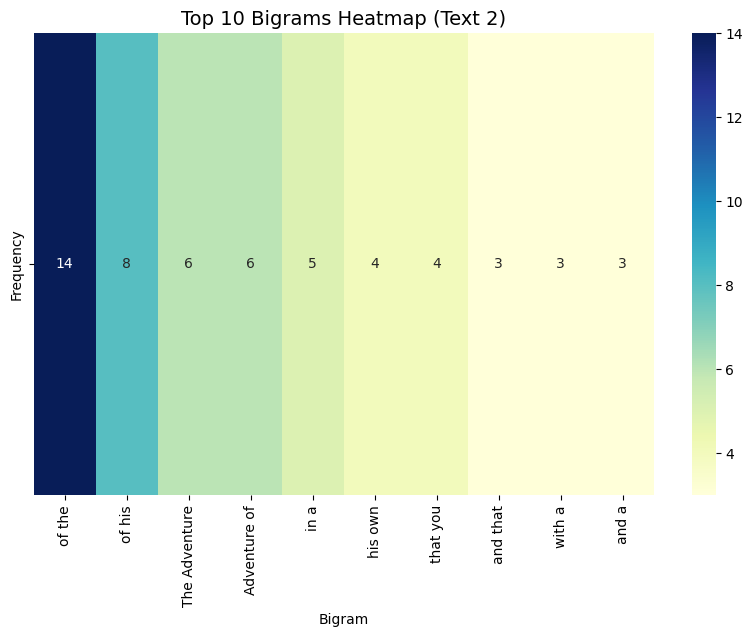

In [64]:
import seaborn as sns
import pandas as pd

def plot_bigram_heatmap(text, top_n=10, title="Bigram Heatmap"):
    """Create a heatmap for top bigrams."""
    text = clean_text(text[:5000])  # Limit to first 5000 chars for speed
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(top_n)

    # Convert to DataFrame for heatmap
    df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency'])
    bigram_labels = [' '.join(b) for b in df['Bigram']]
    heatmap_data = pd.DataFrame({'Bigram': bigram_labels, 'Frequency': df['Frequency']})

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.set_index('Bigram').T, annot=True, cmap='YlGnBu', cbar=True)
    plt.title(title, fontsize=14)
    plt.show()

# Example usage
for key, data in loaded_texts.items():
    plot_bigram_heatmap(data['text'], top_n=10, title=f"Top 10 Bigrams Heatmap ({key})")
